# Lock exchange flow

In a lock exchange experiment fluid with two different densities are initially separated horizontally. At the start of the experiment, the separator is remove and the lighter fluid start to flow over the heavier one, and the heavier fluid flows under the lighter one.
Here we use a test-case from the Delft3D-FM test-bench to illiustrate the wetwin-core gui elements. This test is relatively small (90+430Kb in compressed format), so it can serve as a test-case for new gui elements. The data-set is split in two parts: the histories and the maps.

In [4]:
#data
import xarray as xr
import numpy as np 
import zarr
#plotting
import matplotlib.pyplot as plt 
%matplotlib widget
plt.rcParams['figure.figsize'] = [10, 2]
# gui elements
import ipywidgets as widgets
#from ipyleaflet import *

from wtcore.variables import *
from wtcore.widgets import *
from wtcore.plots import *

In [5]:
map_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/test/locxxz_map.zarr"
#map_url="../DCSM-FM-3D_map.zarr"
map=xr.open_zarr(map_url,consolidated=True)
#map

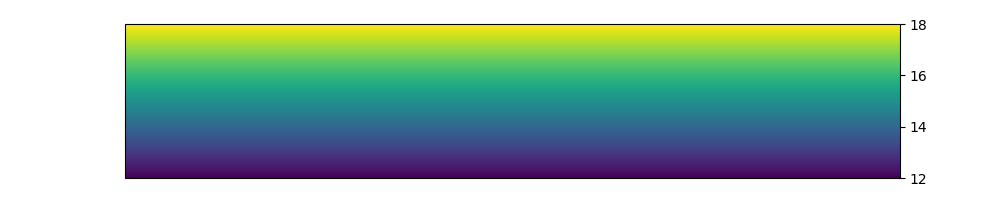

In [17]:
class MyPlot1(wtPlot):
    def __init__(self,map,variables,*args,**kwargs):
        super().__init__(variables,*args,**kwargs)
        #expand here with your own data
        self.map = map
    def redraw(self):
        ax=self.ax
        fig=self.fig
        itime=self.variables[0].value # time-step is first variable
        xs = self.map.x_center
        zs = self.map.z
        iy = 0 #only one cell wide here
        sal_prof = map.salinity.isel(time=itime,y=0) #select part of the data
        pc = ax.pcolormesh(xs,zs,sal_prof,vmin=12,vmax=18) 
        #fig.colorbar(pc,ax=ax) #TODO only steal space for colorboar once

int1=IntVariable("itime","time-step",0,len(map.time),0) #define variable
int1sld=WtIntSlider(int1) #create slider linked to variable int1
p1=MyPlot1(map,[int1]) #create plot linked to variable int1, too
gui=widgets.VBox([int1sld,p1]) #vertical stack of slider and plot
display(gui)
p1.redraw()

In [16]:
?p1.fig.colorbar

Signature: p1.fig.colorbar(mappable, cax=None, ax=None, use_gridspec=True, **kw)
Docstring:
Add a colorbar to a plot.

Parameters
----------
mappable
    The `matplotlib.cm.ScalarMappable` (i.e., `~matplotlib.image.AxesImage`,
    `~matplotlib.contour.ContourSet`, etc.) described by this colorbar.
    This argument is mandatory for the `.Figure.colorbar` method but optional
    for the `.pyplot.colorbar` function, which sets the default to the current
    image.

    Note that one can create a `.ScalarMappable` "on-the-fly" to generate
    colorbars not attached to a previously drawn artist, e.g. ::

        fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)

cax : `~matplotlib.axes.Axes`, optional
    Axes into which the colorbar will be drawn.

ax : `~matplotlib.axes.Axes`, list of Axes, optional
    One or more parent axes from which space for a new colorbar axes will be
    stolen, if *cax* is None.  This has no effect if *cax* is set.

use_gridspec : bool, optional
    I